In [29]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [30]:
env = gym.make('CartPole-v1')

In [31]:
def epsilonGreedyAction(Q, state, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(0, 2)  # Choose random action (0 or 1)
    else:
        return np.argmax(Q[state])  # Choose greedy action based on Q-values


In [32]:
cartPosSpace = np.linspace(-2.4, 2.4,  10)
cartVelSpace = np.linspace(-3.0, 3.0, 10)
poleAngleSpace = np.linspace(-0.20943951, 0.20943951, 10)
poleVelSpace = np.linspace(-3.0, 3.0, 10)

# Discretize the spaces
def getState(observation):
    X, Xdot, Theta, Thetadot = observation
    cartX_bin =int(np.digitize(X, cartPosSpace)) #digitize is used to find the bin index of each variable in its respective space. It maps each variable to the closest bin in the defined space.
    cartXdot_bin = int(np.digitize(Xdot, cartVelSpace))
    cartTheta_bin = int(np.digitize(Theta, poleAngleSpace))
    cartThetadot_bin = int(np.digitize(Thetadot, poleVelSpace))

    return (cartX_bin, cartXdot_bin, cartTheta_bin, cartThetadot_bin)


In [36]:
# Model hyperparameters
ALPHA = 0.1
GAMMA = 0.99
EPSILON = 1.0
# Initialize Q-values
Q = {}
for i in range(11):
    for j in range(11):
        for k in range(11):
            for l in range(11):
                Q[(i, j, k, l)] = np.random.uniform( - 0.5,0.5,size = 2)  # Initialize Q-values for each state-action pair

Episode 0	Average length (last 100 episodes): 25.00
Episode 5000	Average length (last 100 episodes): 35.88
Episode 10000	Average length (last 100 episodes): 60.31
Episode 15000	Average length (last 100 episodes): 135.68
Solved after 16474 episodes! Running average is now 196.23. Last episode ran to 634.0 time steps.


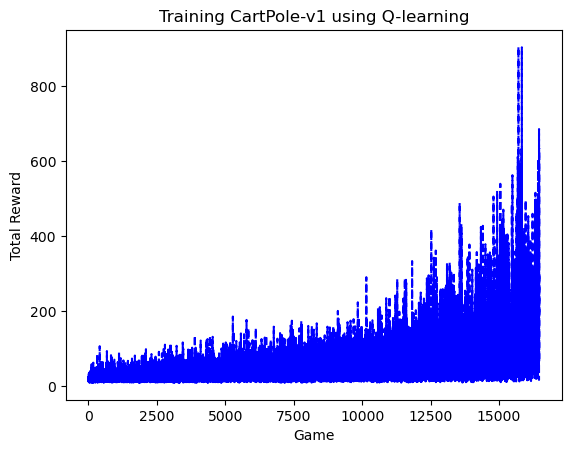

In [37]:
numGames = 50000
totalRewards = []
mean_score = 0.0

for i in range(numGames):
    observation,_ = env.reset()
    s = getState(observation)
    
    epRewards = 0
    done = False

    while not done:
        a = epsilonGreedyAction(Q, s, EPSILON)

        observation_, reward, done, _,_ = env.step(a)
        s_ = getState(observation_)

        epRewards += reward

        # Q-learning Q-value update
        Q[s][a] = Q[s][a] + ALPHA * (reward + GAMMA * np.max(Q[s_]) - Q[s][a])

        s = s_

    # Decay epsilon to balance exploration and exploitation
    EPSILON -= 2 / numGames if EPSILON > 0 else 0
    totalRewards.append(epRewards)
    mean_score = np.mean(totalRewards[-100:])

    if i % 5000 == 0:
        print('Episode {}\tAverage length (last 100 episodes): {:.2f}'.format(i, mean_score))

    if mean_score > 195:
        print("Solved after {} episodes! Running average is now {}. Last episode ran to {} time steps.".format(i, mean_score, epRewards))
        break

plt.plot(totalRewards, 'b--')
plt.xlabel('Game')
plt.ylabel('Total Reward')
plt.title('Training CartPole-v1 using Q-learning')
plt.show()